In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Final_preprocessed_1.csv")

print(df.shape)
print(df.columns)


(15799, 25)
Index(['pl_name', 'pl_rade', 'pl_bmasse', 'pl_orbsmax', 'pl_orbper', 'st_lum',
       'pl_dens', 'pl_eqt', 'st_teff', 'st_spectype', 'st_met', 'st_rad',
       'temp_score', 'radius_score', 'distance_score', 'lum_score',
       'habitability_index', 'st_teff_norm', 'st_rad_norm',
       'stellar_compatibility', 'orb_per_norm', 'orb_dist_norm',
       'orbital_stability', 'target', 'target_class'],
      dtype='object')


In [2]:
df = df.select_dtypes(include=[np.number])


In [3]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with median
df = df.fillna(df.median())

print("Total NaNs left:", df.isna().sum().sum())


Total NaNs left: 0


In [4]:
X = df.drop(['target'], axis=1)
y = df['target']

print("Class Distribution:")
print(y.value_counts())


Class Distribution:
target
0    15306
1      493
Name: count, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (12639, 21)
Test size : (3160, 21)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])


In [7]:
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3061    0]
 [   5   94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3061
           1       1.00      0.95      0.97        99

    accuracy                           1.00      3160
   macro avg       1.00      0.97      0.99      3160
weighted avg       1.00      1.00      1.00      3160



In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[3061    0]
 [   0   99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3061
           1       1.00      1.00      1.00        99

    accuracy                           1.00      3160
   macro avg       1.00      1.00      1.00      3160
weighted avg       1.00      1.00      1.00      3160



In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
!pip install imbalanced-learn

In [12]:
from imblearn.pipeline import Pipeline as ImbPipeline

balanced_pipe = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

balanced_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = balanced_pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3049   12]
 [   0   99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3061
           1       0.89      1.00      0.94        99

    accuracy                           1.00      3160
   macro avg       0.95      1.00      0.97      3160
weighted avg       1.00      1.00      1.00      3160



In [15]:
rf_balanced = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_balanced.fit(X_train, y_train)

y_pred_rf_bal = rf_balanced.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf_bal))
print(classification_report(y_test, y_pred_rf_bal))


[[3061    0]
 [   0   99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3061
           1       1.00      1.00      1.00        99

    accuracy                           1.00      3160
   macro avg       1.00      1.00      1.00      3160
weighted avg       1.00      1.00      1.00      3160



**XG Boost Classifier**

In [16]:
!pip install xgboost

In [17]:
from xgboost import XGBClassifier

xgb_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ))
])

xgb_pipe.fit(X_train, y_train)

y_pred_xgb = xgb_pipe.predict(X_test)

print("----- XGBOOST RESULTS -----")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


----- XGBOOST RESULTS -----
[[3061    0]
 [   0   99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3061
           1       1.00      1.00      1.00        99

    accuracy                           1.00      3160
   macro avg       1.00      1.00      1.00      3160
weighted avg       1.00      1.00      1.00      3160



In [18]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

xgb_balanced = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ))
])

xgb_balanced.fit(X_train, y_train)

y_pred_xgb_bal = xgb_balanced.predict(X_test)

print("----- XGBOOST + SMOTE RESULTS -----")
print(confusion_matrix(y_test, y_pred_xgb_bal))
print(classification_report(y_test, y_pred_xgb_bal))


----- XGBOOST + SMOTE RESULTS -----
[[3061    0]
 [   0   99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3061
           1       1.00      1.00      1.00        99

    accuracy                           1.00      3160
   macro avg       1.00      1.00      1.00      3160
weighted avg       1.00      1.00      1.00      3160



In [20]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Logistic": log_pipe,
    "Random Forest": rf_pipe,
    "Logistic + SMOTE": balanced_pipe,
    "RF + SMOTE": rf_balanced,
    "XGBoost": xgb_pipe,
    "XGBoost + SMOTE": xgb_balanced
}

for name, model in models.items():
    pred = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred))
    print("-" * 40)


Logistic
Accuracy: 0.9984177215189873
F1 Score: 0.9740932642487047
----------------------------------------
Random Forest
Accuracy: 1.0
F1 Score: 1.0
----------------------------------------
Logistic + SMOTE
Accuracy: 0.9962025316455696
F1 Score: 0.9428571428571428
----------------------------------------
RF + SMOTE
Accuracy: 1.0
F1 Score: 1.0
----------------------------------------
XGBoost
Accuracy: 1.0
F1 Score: 1.0
----------------------------------------
XGBoost + SMOTE
Accuracy: 1.0
F1 Score: 1.0
----------------------------------------


In [22]:
import pandas as pd

importances = xgb_pipe.named_steps['xgb'].feature_importances_

feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top Important Features:")
print(feature_imp.head(10))


Top Important Features:
                  Feature  Importance
14     habitability_index    0.972238
2              pl_orbsmax    0.005773
8                  st_met    0.004385
6                  pl_eqt    0.003629
20      orbital_stability    0.003407
3               pl_orbper    0.002299
17  stellar_compatibility    0.002157
10             temp_score    0.002147
0                 pl_rade    0.001807
7                 st_teff    0.000883


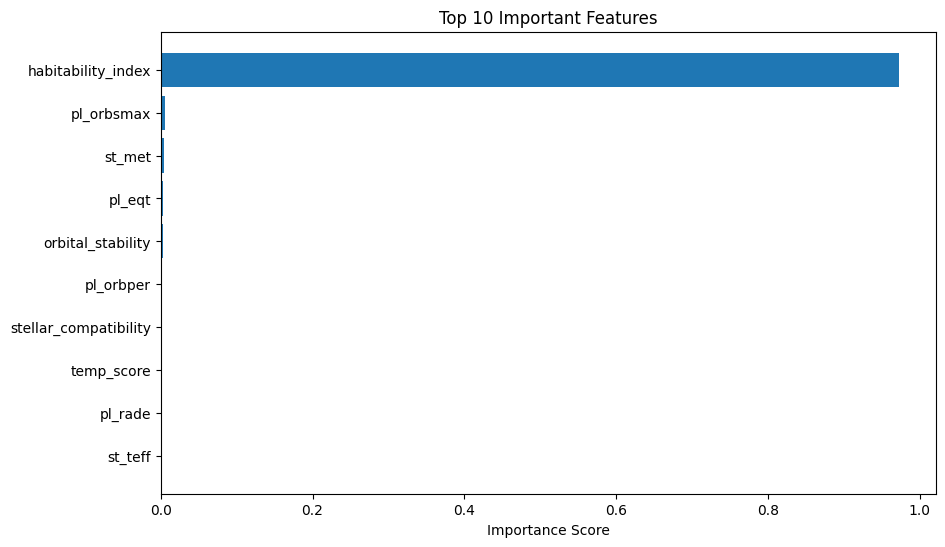

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_imp["Feature"][:10], feature_imp["Importance"][:10])
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


In [26]:
import joblib

joblib.dump(log_pipe, "logistic_model.pkl")

joblib.dump(log_pipe, "logistic_model.pkl")
joblib.dump(rf_pipe, "random_forest_model.pkl")
joblib.dump(balanced_pipe, "logistic_smote_model.pkl")
joblib.dump(xgb_pipe, "xgboost_model.pkl")
joblib.dump(xgb_balanced, "xgboost_smote_model.pkl")


['xgboost_smote_model.pkl']

In [27]:
joblib.dump(rf_balanced, "random_forest_smote_model1.pkl")

['random_forest_smote_model1.pkl']

In [29]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

models = {
    "Logistic Regression": log_pipe,
    "Random Forest": rf_pipe,
    "Logistic + SMOTE": balanced_pipe,
    "Random Forest + SMOTE": rf_balanced,
    "XGBoost": xgb_pipe,
    "XGBoost + SMOTE": xgb_balanced
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Support (Class 1)": support
    })

comparison_df = pd.DataFrame(results)

print("\n===== MODEL COMPARISON =====")
print(comparison_df)



===== MODEL COMPARISON =====
                   Model  Precision    Recall  F1 Score  Accuracy  \
0    Logistic Regression   1.000000  0.949495  0.974093  0.998418   
1          Random Forest   1.000000  1.000000  1.000000  1.000000   
2       Logistic + SMOTE   0.891892  1.000000  0.942857  0.996203   
3  Random Forest + SMOTE   1.000000  1.000000  1.000000  1.000000   
4                XGBoost   1.000000  1.000000  1.000000  1.000000   
5        XGBoost + SMOTE   1.000000  1.000000  1.000000  1.000000   

  Support (Class 1)  
0              None  
1              None  
2              None  
3              None  
4              None  
5              None  
